In [19]:
import csv

data = [
    ["available", "shipped LPG"],
    ["100", "80"],
    ["150", "120"],
    ["200", "180"],
    ["250", "NaN"],
    ["NaN" , "NaN"],
    # Add more rows here...
]

# Add 100 rows with nearly linear growth
for i in range(100):
    available = str(100 + i * 2)  # Increase available by 2 for each row
    shipped_lpg = str(80 + i * 1.6)  # Increase shipped LPG by 1.6 for each row
    data.append([available, shipped_lpg])

filename = "lpg_data.csv"

with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"CSV file '{filename}' created successfully.")


CSV file 'lpg_data.csv' created successfully.


In [20]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('lpg_data.csv')

# Check for NaN rows
nan_rows = df[df.isnull().any(axis=1)]

# Remove NaN rows
df = df.dropna()

# Save the cleaned DataFrame to a new CSV file
df.to_csv('lpg_data_cleaned.csv', index=False)


# Print the updated DataFrame
print(df)


     available  shipped LPG
0        100.0         80.0
1        150.0        120.0
2        200.0        180.0
5        100.0         80.0
6        102.0         81.6
..         ...          ...
100      290.0        232.0
101      292.0        233.6
102      294.0        235.2
103      296.0        236.8
104      298.0        238.4

[103 rows x 2 columns]


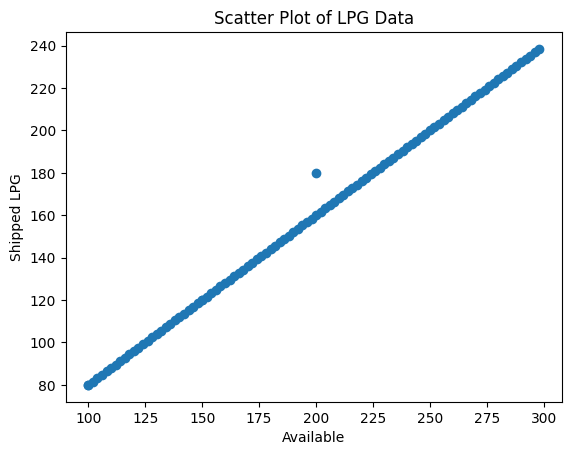

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('lpg_data_cleaned.csv')

# Extract the 'available' and 'shipped LPG' columns
available = df['available']
shipped_lpg = df['shipped LPG']

# Create a scatter plot
plt.scatter(available, shipped_lpg)
plt.xlabel('Available')
plt.ylabel('Shipped LPG')
plt.title('Scatter Plot of LPG Data')
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('lpg_data_cleaned.csv')

# Extract the 'available' and 'shipped LPG' columns as features and target
X = df[['available']]
y = df['shipped LPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)


Mean Squared Error: 0.05940196880227292


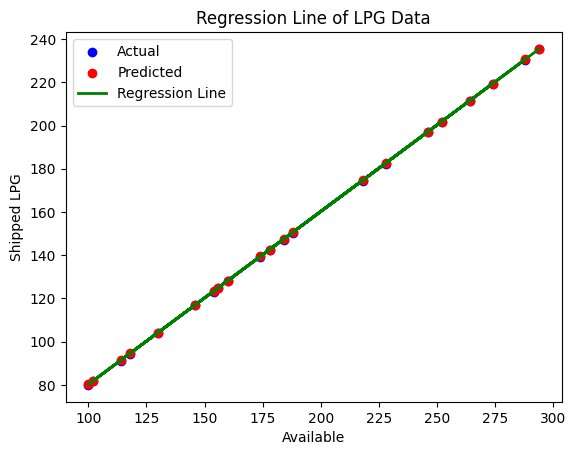

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('lpg_data_cleaned.csv')

# Extract the 'available' and 'shipped LPG' columns as features and target
X = df[['available']]
y = df['shipped LPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Plot the scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# Plot the regression line
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel('Available')
plt.ylabel('Shipped LPG')
plt.title('Regression Line of LPG Data')
plt.legend()
plt.show()


In [28]:
# Predict using the model for 400 available
prediction = model.predict([[500]])

# Print the prediction
print("Prediction for 500 available:", prediction[0])


Prediction for 500 available: 400.2488749612841


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import pickle

# Save the model as a pickle file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'linear_regression_model.pkl'")


Model saved as 'lpg_regression_model.pkl'


In [ ]:
import streamlit as st
import pickle

# Load the saved model
with open('linear_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Define the prediction function
def predict_shipped(available):
    # Predict the shipped LPG using the model
    shipped = model.predict([[available]])
    return shipped[0]

# Create the Streamlit app
def main():
    st.title("Shipping LPG Prediction")
    available = st.number_input("Enter the available quantity", min_value=0)
    shipped = predict_shipped(available)
    st.write("Predicted shipping LPG:", shipped)

if __name__ == "__main__":
    main()
